In [5]:
# Import the numpy library to work with and manipulate the data
import numpy as np
# Import the pandas library to read our dataset
import pandas as pd

#load the data
data = pd.read_csv('https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv',delimiter='\t')

data=data[['Phrase','Sentiment']]
#Print the head of data
data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


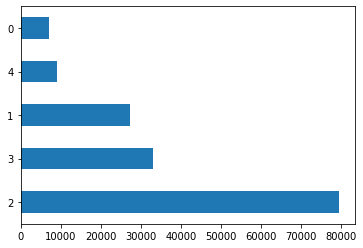

In [6]:
data['Sentiment'].value_counts()[:5].plot(kind='barh')

In [7]:
# Cleaning the data reviews
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation

#Clean the phrases text using lemmatization
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus


data['clean_review']=clean_review(data.Phrase.values)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
from keras.utils import to_categorical
X = data['clean_review']
Y = to_categorical(data['Sentiment'].values)

Using TensorFlow backend.


In [0]:

# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split
# Splits the dataset so 70% is used for training and 30% for testing
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=2003)

In [10]:
#print the size/shape of the training and testing data
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(109242,) (109242, 5)
(46818,) (46818, 5)


In [11]:
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)

#Get the frequency distribution of all the words
dist_freq=FreqDist(all_words)

#Get the number of unique words
unique_words=len(dist_freq)
unique_words

13725

In [12]:
#Get the length of maximum review text

review_len=[]
for text in X_train:
    word=word_tokenize(text)
    l=len(word)
    review_len.append(l)
    
max_rev_len=np.max(review_len)
max_rev_len

48

In [0]:
#Defining feature length
max_features = unique_words
max_words = max_rev_len


In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
#Tokenizing the words to form bag of words

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
#Convert words to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)


In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.sequence import pad_sequences

#Pad the sequences for handling variable length in reviews 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

In [0]:
#Importing keras model, layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.losses import categorical_crossentropy

#Defining the CNN Model for the network
def cNNModel(max_features, max_words):
  model = Sequential()

  # Input / Embdedding
  model.add(Embedding(max_features, 150, input_length=max_words))

  # CNN
  model.add(SpatialDropout1D(0.2))

  model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=2))

  model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=2))

  model.add(Flatten())

  # Output layer
  model.add(Dense(5, activation='sigmoid'))

  return model

In [17]:
#Define the model
model = cNNModel(max_features, max_words)

#Defining number of epochs for the model, number of classes and batch size
batch_size = 128
epochs = 10
num_classes=5

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 109242 samples, validate on 46818 samples
Epoch 1/10





109242/109242 [==============================] - 23s 206us/step - loss: 1.0311 - acc: 0.5857 - val_loss: 0.8727 - val_acc: 0.6368
Epoch 2/10
109242/109242 [==============================] - 10s 95us/step - loss: 0.7935 - acc: 0.6698 - val_loss: 0.8298 - val_acc: 0.6503
Epoch 3/10
109242/109242 [==============================] - 10s 94us/step - loss: 0.7071 - acc: 0.7031 - val_loss: 0.8310 - val_acc: 0.6547
Epoch 4/10
109242/109242 [==============================] - 10s 95us/step - loss: 0.6441 - acc: 0.7276 - val_loss: 0.8500 - val_acc: 0.6576
Epoch 5/10
109242/109242 [==============================] - 10s 93us/step - loss: 0.5924 - acc: 0.7480 - val_loss: 0.8695 - val_acc: 0.6541
Epoch 6/10
109242/109242

In [18]:
#Mount Google drive to save the model

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Save the model
model.save("1117437_1dconv_reg")

In [20]:
from keras.models import load_model

#import and load the model
model = load_model('1117437_1dconv_reg')

#Printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 48, 150)           2058750   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 48, 150)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 32)            14432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)              

In [21]:
#Predicting the classes of the test data

pred2=model.predict_classes(X_val,verbose=1)

46818/46818 [==============================] - 3s 61us/step


In [22]:
#Get the report for the test data
from sklearn.metrics import classification_report

Y_val=np.argmax(Y_val, axis=1)

#Printing the classification report
print(classification_report(Y_val, pred2, digits=5))

              precision    recall  f1-score   support

           0    0.49271   0.29847   0.37174      2151
           1    0.50901   0.60533   0.55301      8070
           2    0.75617   0.74649   0.75130     23987
           3    0.55573   0.54801   0.55184      9872
           4    0.50859   0.46494   0.48579      2738

    accuracy                        0.64326     46818
   macro avg    0.56444   0.53265   0.54274     46818
weighted avg    0.64472   0.64326   0.64209     46818

